這邊有一個資料集是我去識別後的 POS data
總共四個資料集

basket_item 被分成好幾個因為比較大

請大家嘗試把四個資料及合併並嘗試回答以下問題：
找到最佳的產品與顧客組合能帶給我最高的 revenue

此 side-project 並非現階段重要任務，目的是要讓大家熟悉 pandas, polars （）, chaining
請大家找時間練習，把你發現的竅門跟心得記錄下來做為教材
若太難我們可以將其難度降低，請隨時回饋問題或題目調整
此資料即將作為 pandas 最後章節的應用實戰

### 找到最佳的產品與顧客組合能帶給我最高的 revenue


In [1]:
# for data cleaning and processing
import numpy as np
import pandas as pd
import datetime as dt

# for drawing
import seaborn as sns
import matplotlib.pyplot as plt

# for ignoring warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import time
start_time = time.time()
df_basket_items = (
    pd.read_csv('basket_items_modified_4月.csv')
    .append(pd.read_csv('basket_items_modified_5月.csv'), ignore_index=True)
    .append(pd.read_csv('basket_items_modified_6月.csv'), ignore_index=True)
    .append(pd.read_csv('basket_items_modified_7月.csv'), ignore_index=True)
    .append(pd.read_csv('basket_items_modified_8月.csv'), ignore_index=True)
    .append(pd.read_csv('basket_items_modified_9月.csv'), ignore_index=True)
)

df_credit_card = pd.read_csv('credict_card_modified.csv')
df_ele_data = pd.read_csv('ele_data_modified.csv')
df_member_card = pd.read_csv('member_card_modified.csv')


FileNotFoundError: ignored

In [ ]:
df_basket_items.head()

,門市代碼,銷售日期,機台,序號,貨號,短品名,條碼,銷售數量,單價,總金額,門市代碼_,機台_,序號_
0,585000,2018-04-02,43,752,11621,美國甜橙#138,54883,2,15,30,585000,43,752
1,585000,2018-04-02,43,3159,8414,維也納餐包,57649,1,39,39,585000,43,3159
2,585000,2018-04-02,43,1203,19487,蘇菲加長護墊,15355,1,75,75,585000,43,1203
3,585000,2018-04-02,47,2116,45809,可口奶滋鳳梨,53891,1,29,29,585000,47,2116
4,585000,2018-04-02,47,2116,18902,ＪＯ全店印花,39811,1,0,0,585000,47,2116


### 資料清理與過濾
##### 處理df_basket_items

In [ ]:
import time
start_time = time.time()
def cleaning(df):
    df = (
        df.dropna()  # 移除空值
        .drop_duplicates() if df.duplicated().any() else df  # 如果有重複值就移除重複值
    )
    return df

df_basket_items = (
    cleaning(df_basket_items)
    .drop(['門市代碼_', '機台_', '序號_'], axis=1)  # 移除不需要的欄位
)
df_credit_card = cleaning(df_credit_card)


# df_basket_items = (
#     df_basket_items
#     .dropna()  # 移除空值
#     .drop_duplicates() if df_basket_items.duplicated().any() else df_basket_items  # 如果有重複值就移除重複值
#     .drop(['門市代碼_', '機台_', '序號_'], axis=1)  # 移除不需要的欄位
# )


### 資料轉換

In [ ]:
df_basket_items = (
    df_basket_items
    .assign(銷售日期=pd.to_datetime(df_basket_items['銷售日期']))
    .astype({'門市代碼':'object','機台':'object','序號':'object','貨號':'object','條碼':'object'})
)

In [ ]:
df_basket_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 986842 entries, 0 to 1004238
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   門市代碼    986842 non-null  object        
 1   銷售日期    986842 non-null  datetime64[ns]
 2   機台      986842 non-null  object        
 3   序號      986842 non-null  object        
 4   貨號      986842 non-null  object        
 5   短品名     986842 non-null  object        
 6   條碼      986842 non-null  object        
 7   銷售數量    986842 non-null  int64         
 8   單價      986842 non-null  int64         
 9   總金額     986842 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 82.8+ MB


In [ ]:
# 檢查重複
df_basket_items.duplicated().value_counts()

False    986842
dtype: int64

In [ ]:
# #把重複地拿掉
# df_basket_items.drop_duplicates(inplace=True)

In [ ]:
#df_basket_items.loc[df_basket_items.duplicated()]

In [ ]:
df_basket_items.describe()

In [ ]:
df_basket_items.describe(include = 'object')

In [ ]:
df_basket_items.head()

In [ ]:
df_basket_items.info()

In [ ]:
df_commodity_count = (
    df_basket_items
    .groupby('短品名')['銷售數量']
    .sum()
    .reset_index()
    .sort_values(by='銷售數量', ascending=False)
    .head(20)
)

In [ ]:
df_commodity_price = (
    df_basket_items
    .groupby('短品名')['總金額']
    .sum()
    .reset_index()
    .sort_values(by='總金額', ascending=False)
    .head(20)
)

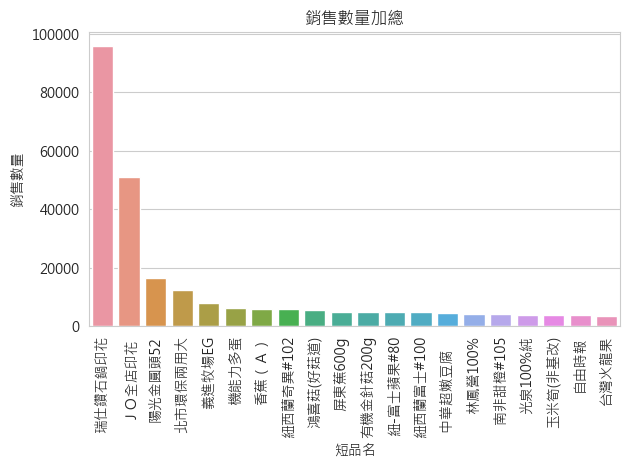

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid", {"font.sans-serif": ['Microsoft JhengHei']})

# 使用groupby計算'銷售數量'加總並繪製條形圖
(df_basket_items
 .groupby('短品名')['銷售數量']
 .sum()
 .reset_index()
 .sort_values(by='銷售數量', ascending=False)
 .head(20)
 .pipe(lambda df: sns.barplot(x='短品名', y='銷售數量', data=df)))

# 設定圖表標題和軸標籤
plt.title('銷售數量加總')
plt.xlabel('短品名')
plt.ylabel('銷售數量')

# 轉換X軸標籤為垂直方向
plt.xticks(rotation=90)
# 調整圖表大小，避免標籤重疊
plt.tight_layout()

# 顯示圖表
plt.show()

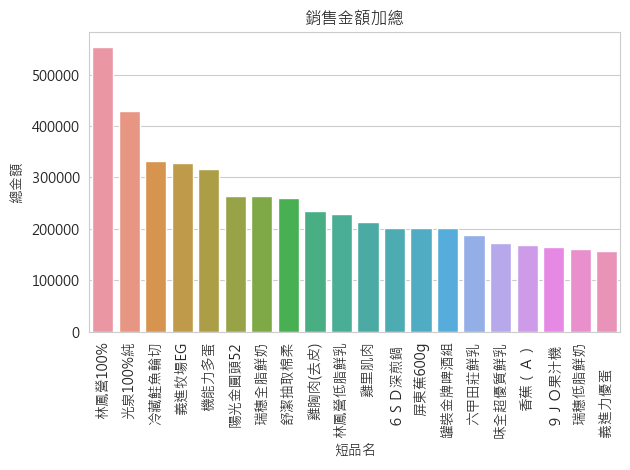

In [ ]:
sns.set_style("whitegrid", {"font.sans-serif": ['Microsoft JhengHei']})

# 使用groupby計算'總金額'加總並繪製條形圖
(df_basket_items
 .groupby('短品名')['總金額']
 .sum()
 .reset_index()
 .sort_values(by='總金額', ascending=False)
 .head(20)
 .pipe(lambda df: sns.barplot(x='短品名', y='總金額', data=df)))

# 設定圖表標題和軸標籤
plt.title('銷售金額加總')
plt.xlabel('短品名')
plt.ylabel('總金額')

# 轉換X軸標籤為垂直方向
plt.xticks(rotation=90)
# 調整圖表大小，避免標籤重疊
plt.tight_layout()

# 顯示圖表
plt.show()

### 處理df_credit_card 格式

In [ ]:
# 檢查空值
df_credit_card.isna().any()

In [ ]:
df_credit_card = (
    df_credit_card
    .assign(銷售日期 = pd.to_datetime(df_credit_card['銷售日期']),
            時間 = pd.to_datetime(df_credit_card['時間']).dt.strftime('%H:%M'))
    .astype({'項次':'object',
            '機台':'object',
            '序號':'object',
            '授權碼':'object',
            '調閱編號':'object',
            '卡號':'object',
            '員工代號':'object'})
)


# df_credit_card['項次']=df_credit_card['項次'].astype('object')
# df_credit_card['銷售日期']=pd.to_datetime(df_credit_card['銷售日期'])
# df_credit_card['機台']=df_credit_card['機台'].astype('object')
# df_credit_card['序號']=df_credit_card['序號'].astype('object')
# df_credit_card['時間']=pd.to_datetime(df_credit_card['時間'])
# df_credit_card['時間']=df_credit_card['時間'].dt.strftime('%H:%M')
# df_credit_card['授權碼']=df_credit_card['授權碼'].astype('object')
# df_credit_card['調閱編號']=df_credit_card['調閱編號'].astype('object')
# df_credit_card['卡號']=df_credit_card['卡號'].astype('object')
# df_credit_card['員工代號']=df_credit_card['員工代號'].astype('object')


In [ ]:
(
    df_credit_card :=
    df_credit_card
    .assign(
        銷售日期=pd.to_datetime(df_credit_card['銷售日期']),
        時間=pd.to_datetime(df_credit_card['時間']).dt.strftime('%H:%M'),
    )
    .astype({
        '項次':'object',
        '機台':'object',
        '序號':'object',
        '授權碼':'object',
        '調閱編號':'object',
        '卡號':'object',
        '員工代號':'object',
    })
)

In [ ]:
df_credit_card.info()

In [ ]:
# 檢查重複
df_credit_card.duplicated().value_counts()

In [ ]:
df_credit_card.describe(include = 'object')

### 處理ele_data 格式

### 處理member_data 格式

------

## 嘗試合併表格

In [ ]:
(df_basket_items
               .loc[(df_basket_items['序號'] == 3069) &
                    (df_basket_items['銷售日期'] == '2018-04-02') &
                    (df_basket_items['機台'] == 66)]
              )

,門市代碼,銷售日期,機台,序號,貨號,短品名,條碼,銷售數量,單價,總金額
3894,585000,2018-04-02,66,3069,27505,日正優質果糖,19945,1,48,48
3895,585000,2018-04-02,66,3069,34326,白吐司(條),58310,1,37,37


In [ ]:
(df_credit_card
    .loc[(df_credit_card['序號'] == 3069) &
    (df_credit_card['銷售日期'] == '2018-04-02')]
)

,項次,銷售日期,機台,序號,時間,交易型態,授權碼,調閱編號,卡號,授權銀行簡稱,信用卡金額,信用卡紅利折抵,過卡方式,員工代號


In [ ]:
# Chandler
(
    df_credit_card
    .loc[
        (df_credit_card['序號'] == 3069) &
        (df_credit_card['銷售日期'] == '2018-04-02')
    ]
)

處理ele_data

In [ ]:
(
    df_basket_items
    .loc[(df_basket_items['序號'] == 2513) &
    (df_basket_items['銷售日期'] == '2018-04-02') &
    (df_basket_items['機台'] == 66)]
)

,門市代碼,銷售日期,機台,序號,貨號,短品名,條碼,銷售數量,單價,總金額
2158,585000,2018-04-02,66,2513,60099,高達乾酪片,16967,1,105,105
2159,585000,2018-04-02,66,2513,15881,茂谷柑,32563,1,79,79
2160,585000,2018-04-02,66,2513,44943,屏東蕉600g,7529,1,49,49
2332,585000,2018-04-02,66,2513,51739,農心辛拉麵,25119,2,32,64
2333,585000,2018-04-02,66,2513,18902,ＪＯ全店印花,39811,1,0,0
2390,585000,2018-04-02,66,2513,32981,澳穀飼牛漢堡排,45946,1,189,189
2392,585000,2018-04-02,66,2513,42990,鳳梨(削皮),20763,1,69,69
2393,585000,2018-04-02,66,2513,43759,牧大寶貝蛋,18287,1,62,62
2394,585000,2018-04-02,66,2513,22672,茄子,15962,1,29,29
2395,585000,2018-04-02,66,2513,59057,青花菜,46435,1,22,22


In [ ]:
(df_ele_data
    .loc[(df_ele_data['序號'] == 2513) &
    (df_ele_data['銷售日期'] == '2018/4/2')]
    )

,項次,銷售日期,機台,序號,時間,交易型態,票證晶片碼,交易前餘額,扣款金額,現金加值金額,現金加值取消,自動加值金額,交易後餘額,票證種類
0,1,2018/4/2,585066,2513,22:33,銷售交易,8597084,874,297,0,0,0,577,悠遊卡


In [ ]:
(df_credit_card
.loc[(df_credit_card['序號'] == 2513) &
    (df_credit_card['銷售日期'] == '2018-04-02')]
)

,項次,銷售日期,機台,序號,時間,交易型態,授權碼,調閱編號,卡號,授權銀行簡稱,信用卡金額,信用卡紅利折抵,過卡方式,員工代號


處理member_card

In [ ]:
(df_basket_items
.loc[(df_basket_items['序號'] == 1066) &
        (df_basket_items['銷售日期'] == '2018-04-02') &
        (df_basket_items['機台'] == 66)]
)

,門市代碼,銷售日期,機台,序號,貨號,短品名,條碼,銷售數量,單價,總金額
1281,585000,2018-04-02,66,1066,62378,南投蕉600g,50910,1,49,49
1282,585000,2018-04-02,66,1066,60500,小饞優格原味,55364,1,23,23


In [ ]:
(df_member_card
.loc[(df_member_card['交易序號'] == 1066) &
    (df_member_card['日期'] == '2018/4/2') &
    (df_member_card['機台'] == 585066)]
)

,序號,日期,機台,交易序號,時間,發票字軌號碼,銷貨型態,福利卡編號,本 次加值金額,本次扣儲值金額,本次紅利抵現金額,紅利點數,非 IC 卡,消費金額
0,2,2018/4/2,585066,1066,08:01,118554,消費結帳,2606791,0,0,0,0,72,72


## 結論：
* 用【銷售日期+機台+序號】合併表格
* 機台需要再+5850

In [ ]:
df_basket_items.info()

## 購物籃分析

In [ ]:
df_basket_items = (
    df_basket_items
    .assign(
        # Rebuild basket id column
        購物籃編號 = (
        df_basket_items['銷售日期'].dt.strftime('%Y%m%d')
        + '5850'
        + df_basket_items['機台'].astype(str)
        + df_basket_items['序號'].astype(str)
        ),
    )
    .assign( # Summerize total amount
        購物籃營收 = (
        df_basket_items
        .groupby('購物籃編號')['總金額']
        .transform('sum')),
    )
    .sort_values(by='購物籃營收',ascending=False) # Sort values
    # .head() # Un-comment if needed
)

# df_basket_items['購物籃編號'] = df_basket_items['銷售日期'].dt.strftime('%Y%m%d') + '5850' + df_basket_items['機台'].astype(str) + df_basket_items['序號'].astype(str)
# df_basket_items['購物籃營收'] = df_basket_items.groupby('購物籃編號')['總金額'].transform('sum')
# df_basket_items.sort_values(by='購物籃營收',ascending=False)

In [ ]:
(
    df_basket_items := 
    df_basket_items
    .assign(
        # Rebuild basket id column
        購物籃編號=lambda df: (
            df['銷售日期'].dt.strftime('%Y%m%d')
            + '5850'
            + df['機台'].astype(str)
            + df['序號'].astype(str)
        ),
        # Summerize total amount
        購物籃營收=lambda df: (
            df
            .groupby('購物籃編號')
            ['總金額']
            .transform('sum')
        ),
    )
    # Sort values
    .sort_values(by='購物籃營收', ascending=False)
    # .head() # Un-comment if needed
)

# df_basket_items['購物籃編號'] = df_basket_items['銷售日期'].dt.strftime('%Y%m%d') + '5850' + df_basket_items['機台'].astype(str) + df_basket_items['序號'].astype(str)
# df_basket_items['購物籃營收'] = df_basket_items.groupby('購物籃編號')['總金額'].transform('sum')
# df_basket_items.sort_values(by='購物籃營收',ascending=False)

In [ ]:
# df_basket_items.head()

找出最高營收的購物籃

In [ ]:
revenue_per_basket = (
    df_basket_items
    .groupby('購物籃編號')
    ['總金額']
    .sum()
    .to_frame()
    .sort_values(by='總金額',ascending=False)
    # .head(15)
    # .select()
    # .loc[df_basket_items['購物籃編號'] == '20180423585047833']
)

# df_revenue_per_basket = revenue_per_basket.to_frame()
# df_revenue_per_basket.sort_values(by='總金額',ascending=False).head(15)

In [ ]:
# df_basket_items[df_basket_items['購物籃編號'] == '20180423585047833']

## Apriori演算法

In [ ]:
columns_to_keep = ['短品名', '購物籃編號']
df_apriori = df_basket_items.filter(columns_to_keep)

In [ ]:
df_apriori

,短品名,購物籃編號
852974,絕品咖哩中辛,201808315850433169
852975,極品咖哩甘口,201808315850433169
853010,佛蒙特咖哩甜味,201808315850433169
853011,瑞仕鑽石鍋印花,201808315850433169
794903,維力炸醬素１２,201808235850471666
...,...,...
796741,上好佳原味薯條,201808235850472020
796740,上好佳洋蔥圈,201808235850472020
796739,波蜜果菜汁,201808235850472020
796738,優鮮沛蔓越莓綜,201808235850472020


In [ ]:
df_apriori = (
    df_apriori
    .groupby('購物籃編號')['短品名']
    .apply(list)
    .reset_index(name='品項')
    )
df_apriori['品項'] = df_apriori['品項'].apply(lambda x: list(set(x)))  # 使用集合去除重複值
df_apriori

,購物籃編號,品項
0,201804025850431000,[蘇菲極緻柔貼40]
1,201804025850431016,"[結球白菜, 黃金豆漿吐司, 胡蘿蔔吐司, 甘藍(高麗菜), ＪＯ全店印花, 蘋果日報, 味..."
2,201804025850431025,[悅氏礦泉水]
3,201804025850431026,"[里港文富餛飩, 義進牧場EG]"
4,201804025850431030,[寒天-百香果綠]
...,...,...
244693,20180921585066962,"[瑞仕鑽石鍋印花, 柳營鮮乳]"
244694,20180921585066963,[必安住殺蟑餌劑]
244695,20180921585066969,"[活益多減糖, 活益多原味, 陽光黃金豆豆漿]"
244696,20180921585066971,"[金牌蛋, 超極小粒納豆, 春風抽取衛生紙, 瑞仕鑽石鍋印花, 極小粒納豆, 南非甜橙#10..."


In [ ]:
transactions = df_apriori['品項'].tolist()
# 把一些附屬品刪除
transactions = [[item for item in sublist if item not in ['瑞仕鑽石鍋印花', 'ＪＯ全店印花','北市環保兩用大']] for sublist in transactions]

參數還要再進行調整

In [ ]:
from apyori import apriori
rules = apriori(
    transactions = transactions,
    min_support = 0.002,
    min_confidence = 0.01,
    min_lift = 2,
    min_length = 2,
    max_length = 2)
results = list(rules)
results

[RelationRecord(items=frozenset({'聯合報', '中國時報'}), support=0.0021209817816246965, ordered_statistics=[OrderedStatistic(items_base=frozenset({'中國時報'}), items_add=frozenset({'聯合報'}), confidence=0.42471358428805234, lift=31.20917857300836), OrderedStatistic(items_base=frozenset({'聯合報'}), items_add=frozenset({'中國時報'}), confidence=0.15585585585585585, lift=31.209178573008355)]),
 RelationRecord(items=frozenset({'鴻喜菇(好菇道)', '雪白菇(好菇道)'}), support=0.006877865777407253, ordered_statistics=[OrderedStatistic(items_base=frozenset({'雪白菇(好菇道)'}), items_add=frozenset({'鴻喜菇(好菇道)'}), confidence=0.5359872611464968, lift=27.467017974455594), OrderedStatistic(items_base=frozenset({'鴻喜菇(好菇道)'}), items_add=frozenset({'雪白菇(好菇道)'}), confidence=0.35246073298429315, lift=27.46701797445559)])]

In [ ]:
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))

resultsinDataFrame = pd.DataFrame(
    inspect(results),
    columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift']
    )
resultsinDataFrame.sort_values(by='Lift',ascending=False)

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,中國時報,聯合報,0.002121,0.424714,31.209179
1,雪白菇(好菇道),鴻喜菇(好菇道),0.006878,0.535987,27.467018
